In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [2]:
data = pd.read_csv("C:/Users/hp/Stock Prediction/Google_Stock_Price_Train.csv", index_col = "Date", parse_dates = True)

In [3]:
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
#Check null values
data.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


<AxesSubplot:xlabel='Date'>

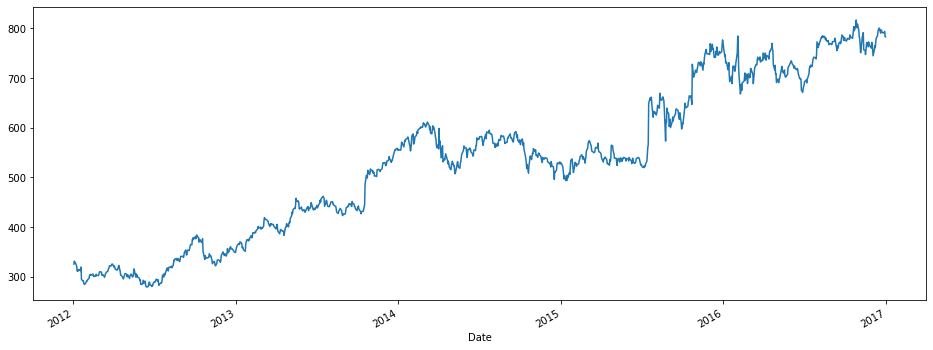

In [6]:
data['Open'].plot(figsize=(16,6))

In [7]:
#Convert column "a" of Dataframe
data["Close"] = data["Close"].str.replace(',','').astype(float)

In [8]:
data["Volume"] = data["Volume"].str.replace(',','').astype(float)

In [9]:
#take 7 days rolling mean
data.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN
2012-01-11,323.002857,325.392857,318.682857,643.132857,7.208100e+06
2012-01-12,321.457143,322.882857,316.841429,638.037143,6.691514e+06
2012-01-13,318.698571,319.801429,314.025714,631.870000,6.531857e+06


<AxesSubplot:xlabel='Date'>

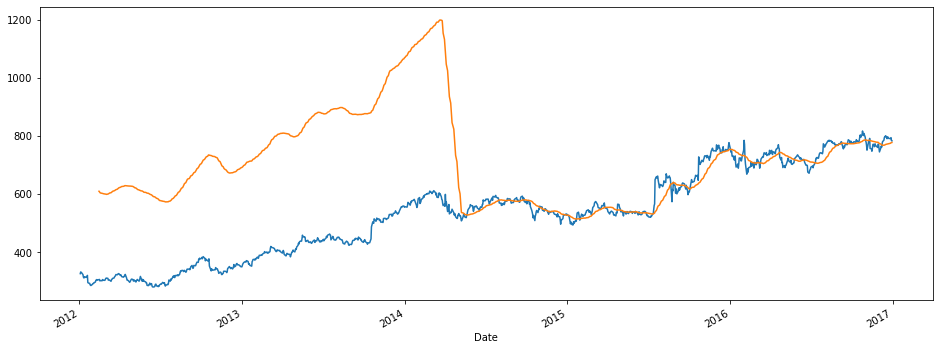

In [10]:
data['Open'].plot(figsize=(16,6))
data.rolling(window=30).mean()["Close"].plot()

<AxesSubplot:xlabel='Date'>

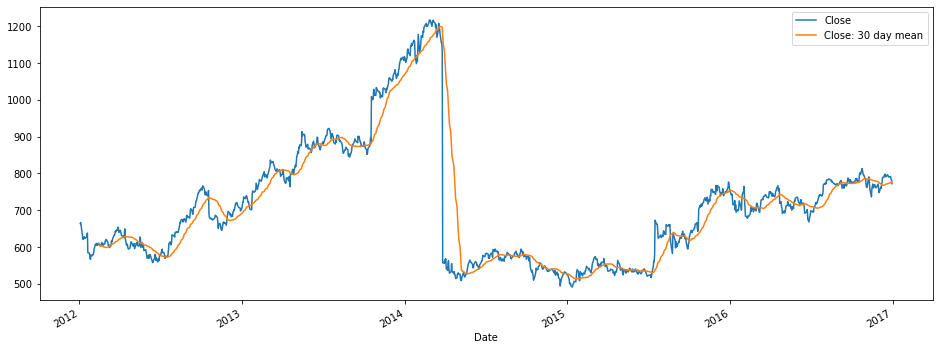

In [11]:
data['Close: 30 day mean'] = data['Close'].rolling(30).mean()
data[['Close', 'Close: 30 day mean']].plot(figsize=(16,6))

In [12]:
train_set = data["Open"]
train_set = pd.DataFrame(train_set)

In [13]:
#Data Cleaning
data.isna().any()

Open                  False
High                  False
Low                   False
Close                 False
Volume                False
Close: 30 day mean     True
dtype: bool

In [14]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(train_set)

In [15]:
#Data Structure with 60 timestamps and 1 output
X_train = []
y_train = []
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

#reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [21]:
!pip install keras

In [23]:
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=7ea6e7d0a0e627bbd9786c3a1570148ebfcb9dfe7b9c198e4e7b9b58e2f2e750
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0


In [16]:
#Building RNN and LSTM
#Import keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout



In [17]:
#Initializing RNN
regressor = Sequential()

In [18]:
#Adding the first LSTM layer and some Dropout Regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

#Adding the second LSTM layer and some Dropout Regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

#Adding the third LSTM layer and some Dropout Regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

#Adding the fourth LSTM layer and some Dropout Regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

#Adding output layer
regressor.add(Dense(units = 1))

In [19]:
#Compiling RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

#Fitting RNN to Training Set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 24s 181ms/step - loss: 0.0427
Epoch 2/100
38/38 [==============================] - 8s 215ms/step - loss: 0.0060
Epoch 3/100
38/38 [==============================] - 8s 219ms/step - loss: 0.0056
Epoch 4/100
38/38 [==============================] - 7s 187ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 7s 181ms/step - loss: 0.0051
Epoch 6/100
38/38 [==============================] - 7s 185ms/step - loss: 0.0055
Epoch 7/100
38/38 [==============================] - 7s 182ms/step - loss: 0.0059
Epoch 8/100
38/38 [==============================] - 7s 178ms/step - loss: 0.0050 0s - loss: 0.
Epoch 9/100
38/38 [==============================] - 7s 195ms/step - loss: 0.0043
Epoch 10/100
38/38 [==============================] - 9s 230ms/step - loss: 0.0043
Epoch 11/100
38/38 [==============================] - 7s 182ms/step - loss: 0.0046
Epoch 12/100
38/38 [==============================] - 7s 179ms/step - loss: 0.004

38/38 [==============================] - 8s 199ms/step - loss: 0.0013
Epoch 99/100
38/38 [==============================] - 7s 193ms/step - loss: 0.0015
Epoch 100/100
38/38 [==============================] - 7s 178ms/step - loss: 0.0014


In [20]:
#Part_3 Make Predictions &Visualizing results
data_test = pd.read_csv("C:/Users/hp/Stock Prediction/Google_Stock_Price_Test.csv", index_col = "Date", parse_dates = True)

In [21]:
real_stock_price = data_test.iloc[:, 1:2].values

In [22]:
data_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"


In [23]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
 1   High    20 non-null     float64
 2   Low     20 non-null     float64
 3   Close   20 non-null     float64
 4   Volume  20 non-null     object 
dtypes: float64(4), object(1)
memory usage: 960.0+ bytes


In [24]:
data_test['Volume'] = data_test["Volume"].str.replace(',','').astype(float)

In [25]:
test_set = data_test['Open']
test_set = pd.DataFrame(test_set)

In [26]:
data_total = pd.concat((data["Open"], data_test['Open']), axis = 0)
inputs = data_total[len(data_total) - len(data_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_stock_price = regressor.predict(X_test)
pred_stock_price = sc.inverse_transform(pred_stock_price)


In [27]:
pred_stock_price = pd.DataFrame(pred_stock_price)
pred_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


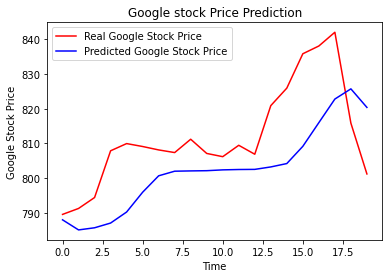

In [28]:
#Visualizing the result
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(pred_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()